# Step 1: Overview
The stabilityai/stable-diffusion-xl-base-1.0 model is used to generate and modify images based on text prompts. It is a Latent Diffusion Model that uses two fixed, pretrained text encoders (OpenCLIP-ViT/G and CLIP-ViT/L).

In [12]:
# !pip install diffusers --upgrade
# !pip install invisible_watermark transformers accelerate safetensors

# Step 2: Loading the Model
Now that our environment is set up, let’s load the stabilityai/stable-diffusion-xl-base-1.0 model in Python. The provided code initializes the diffusion pipeline and refiner models:

# Stable Diffusion XL Base 1.0

# Model Overview:

Type: Stable Diffusion XL (SDXL) is an advanced variant of the original Stable Diffusion model.

Purpose: It is designed for generating high-quality images from textual descriptions.

Provider: Stability AI, a leading company in the development of open-source generative models.


# Training Data:

The model is trained on a diverse dataset containing a wide range of images and associated textual descriptions. This extensive training enables it to understand and generate a broad spectrum of visual content.

In [18]:
from diffusers import DiffusionPipeline  # Import the DiffusionPipeline class from the diffusers library
import torch  # Import the torch library for tensor operations

# Initialize the base pipeline
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",  # Specify the model checkpoint to load for the base pipeline
    torch_dtype=torch.float16,  # Set the data type for tensors to float16, which is half-precision floating point
    use_safetensors=True,  # Enable safe tensors, which is typically used for numerical stability (Safe tensors are designed to improve numerical stability during model operations. By using safe tensors, the model can potentially reduce the risk of numerical errors and improve the overall robustness of the computations.)
    variant="fp16"  # Specify the variant as fp16, indicating the model is optimized for float16 operations (The variant parameter is set to "fp16", indicating that the model is optimized for operations using float16 precision. Float16, also known as half-precision, reduces the memory footprint and computational load compared to full precision (float32). This variant is particularly useful for leveraging hardware accelerators like GPUs that perform well with half-precision arithmetic, leading to faster computation and reduced memory usage.)
)

pipe.to("cuda")  # Move the pipeline to GPU (CUDA) for faster computation if CUDA is available

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [19]:
# Sample text input
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."

In [20]:
# Negative prompt (optional)
negative_prompt = "Avoid including any water elements in the scene."


In [21]:
# Generate image from text
images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

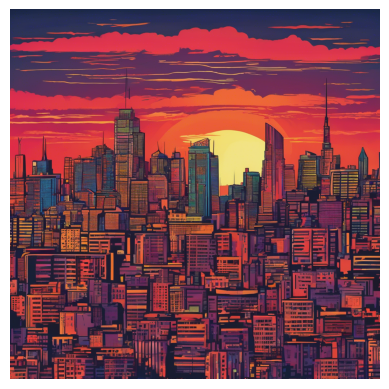

In [22]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(images)
plt.axis('off')
plt.show()

# Proper APP

  0%|          | 0/50 [00:00<?, ?it/s]

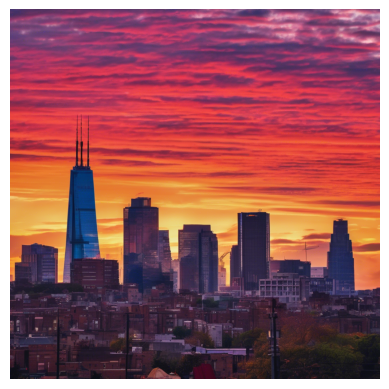

In [8]:
def generate_image(prompt, negative_prompt):
    # Generate image using the base pipeline
    images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]
    
    # Display the image using matplotlib
    plt.imshow(images)
    plt.axis('off')
    plt.show()

# Example usage
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."
negative_prompt = "Avoid including any water elements in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

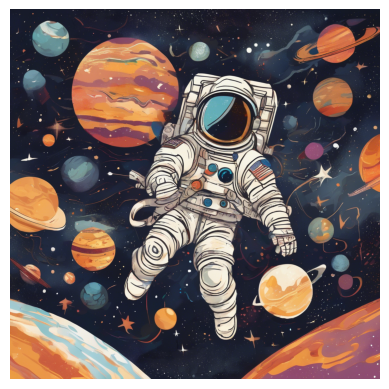

In [9]:
# Example usage
prompt = "A spaceman floating in the galaxy with stars and planets around."
negative_prompt = "Avoid including any alien creatures in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

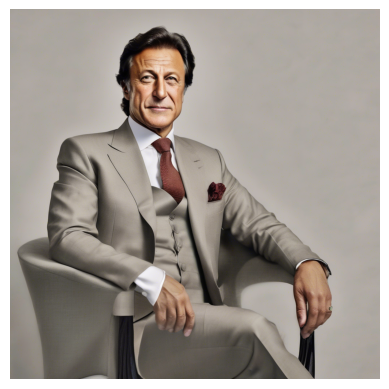

In [10]:
# Example usage
prompt = "A portrait of the Prime Minister of Pakistan, Imran Khan, in a formal suit."
negative_prompt = "Avoid including any other people in the scene."
generate_image(prompt, negative_prompt)